<a href="https://colab.research.google.com/github/MadhurAwasthi/Credit-Card-Default-Prediction/blob/main/Credit_Card_Default_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# <b><u> Project Title : Predicting whether a customer will default on his/her credit card </u></b>

## <b> Problem Description </b>

### This project is aimed at predicting the case of customers default payments in Taiwan. From the perspective of risk management, the result of predictive accuracy of the estimated probability of default will be more valuable than the binary result of classification - credible or not credible clients. We can use the [K-S chart](https://www.listendata.com/2019/07/KS-Statistics-Python.html) to evaluate which customers will default on their credit card payments


## <b> Data Description </b>

### <b>Attribute Information: </b>

### This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:
* ### X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
* ### X2: Gender (1 = male; 2 = female).
* ### X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
* ### X4: Marital status (1 = married; 2 = single; 3 = others).
* ### X5: Age (year).
* ### X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
* ### X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.
* ### X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.

### **Importing important libraries**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

### **Mounting Drive**

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
pip install --upgrade xlrd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [57]:
data_df=pd.read_excel('/content/drive/MyDrive/CAPSTONE PROJECT CLASSIFICATION/default of credit card clients.xls', header =1)

Dataset
There are 25 variables in the dataset. They are:

* ID: ID of each client
*LIMIT_BAL: Amount of given credit in NT dollars :it includes both the individual consumer credit and his/her family (supplementary) credit.
*SEX: Gender (1=male, 2=female)
*EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others)
*MARRIAGE: Marital status (1=married, 2=single, 3=others)
*AGE: Age in years
*PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, ... 8=payment delay for eight months, 9=payment delay for nine months and above)
*PAY_2: Repayment status in August, 2005 (scale same as above)
*PAY_3: Repayment status in July, 2005 (scale same as above)
*PAY_4: Repayment status in June, 2005 (scale same as above)
*PAY_5: Repayment status in May, 2005 (scale same as above)
*PAY_6: Repayment status in April, 2005 (scale same as above)
*BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
*BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
*BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
*BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
*BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
*BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)
*PAY_AMT1: Amount of payment in September, 2005 (NT dollar)
*PAY_AMT2: Amount of payment in August, 2005 (NT dollar)
*PAY_AMT3: Amount of payment in July, 2005 (NT dollar)
*PAY_AMT4: Amount of payment in June, 2005 (NT dollar)
*PAY_AMT5: Amount of payment in May, 2005 (NT dollar)
*PAY_AMT6: Amount of payment in April, 2005 (NT dollar)
*default payment next month: The target variable indicating default of payment (1=default, 0=non-default)

In [58]:
#checking all columns by name
data_df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [59]:
data_df.head(10)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
5,6,50000,1,1,2,37,0,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,0
6,7,500000,1,1,2,29,0,0,0,0,...,542653,483003,473944,55000,40000,38000,20239,13750,13770,0
7,8,100000,2,2,2,23,0,-1,-1,0,...,221,-159,567,380,601,0,581,1687,1542,0
8,9,140000,2,3,1,28,0,0,2,0,...,12211,11793,3719,3329,0,432,1000,1000,1000,0
9,10,20000,1,3,2,35,-2,-2,-2,-2,...,0,13007,13912,0,0,0,13007,1122,0,0


In [60]:
data_df.tail(10)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
29990,29991,140000,1,2,1,41,0,0,0,0,...,138262,49675,46121,6000,7000,4228,1505,2000,2000,0
29991,29992,210000,1,2,1,34,3,2,2,2,...,2500,2500,2500,0,0,0,0,0,0,1
29992,29993,10000,1,3,1,43,0,0,0,-2,...,0,0,0,2000,0,0,0,0,0,0
29993,29994,100000,1,1,2,38,0,-1,-1,0,...,70626,69473,55004,2000,111784,4000,3000,2000,2000,0
29994,29995,80000,1,2,2,34,2,2,2,2,...,77519,82607,81158,7000,3500,0,7000,0,4000,1
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1
29999,30000,50000,1,2,1,46,0,0,0,0,...,36535,32428,15313,2078,1800,1430,1000,1000,1000,1


In [61]:
#evaluate no of rows and columns
print('NO of rows = '+ str(data_df.shape[0]))
print('NO of columns = '+ str(data_df.shape[1]))

NO of rows = 30000
NO of columns = 25


In [10]:
#checking nan values
data_df.isna().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [11]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [12]:
#describing data_df
data_df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [62]:
#rename column name 'default payment next month' to 'DEFAULT_PAY'
data_df.rename(columns={'default payment next month':'DEFAULT_PAY'},inplace = True)
data_df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'DEFAULT_PAY'],
      dtype='object')

In [14]:
#check if there is any duplicate IDs
data_df.duplicated(subset = 'ID',keep = 'first').sum()

0

In [15]:
data_df['LIMIT_BAL'].value_counts()

50000      3365
20000      1976
30000      1610
80000      1567
200000     1528
           ... 
730000        2
1000000       1
327680        1
760000        1
690000        1
Name: LIMIT_BAL, Length: 81, dtype: int64

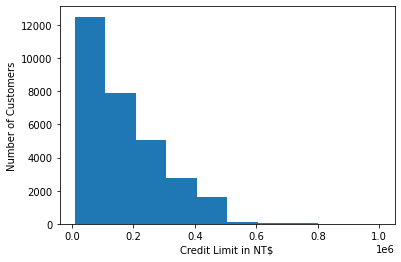

In [16]:
#plot histogram to view the distribution of credit limit
plt.hist(data_df["LIMIT_BAL"])
plt.xlabel('Credit Limit in NT$')
plt.ylabel('Number of Customers')
plt.show()

In [63]:
#check sex column 1: male, 2: female
data_df["SEX"].value_counts()

2    18112
1    11888
Name: SEX, dtype: int64

In [18]:
data_df.head(5)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT_PAY
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [64]:
data_df['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

EDUCATION column has total 7 values (0 to 6) but in the given dataset description it should be ( 1 to 4) values so we combine 0 , 5 & 6 with 4 which means 'other'

In [65]:
# Change values 4, 5, 6 to 0
# 1=graduate school, 2=university, 3=high school, 0=others
data_df["EDUCATION"] = data_df["EDUCATION"].replace({0:4,5:4,6:4})
data_df["EDUCATION"].value_counts()


2    14030
1    10585
3     4917
4      468
Name: EDUCATION, dtype: int64

In [66]:
data_df['MARRIAGE'].value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

MARRIAGE column has four values (0 to 3) but in the given dataset description  we should have only three values (1,2,3) so we combine 0 to 3 which means 'other'

In [67]:
data_df['MARRIAGE'] = data_df['MARRIAGE'].replace({0:3})
data_df['MARRIAGE'].value_counts()

2    15964
1    13659
3      377
Name: MARRIAGE, dtype: int64

In [23]:
data_df['AGE'].value_counts()

29    1605
27    1477
28    1409
30    1395
26    1256
31    1217
25    1186
34    1162
32    1158
33    1146
24    1127
35    1113
36    1108
37    1041
39     954
38     944
23     931
40     870
41     824
42     794
44     700
43     670
45     617
46     570
22     560
47     501
48     466
49     452
50     411
51     340
53     325
52     304
54     247
55     209
56     178
58     122
57     122
59      83
60      67
21      67
61      56
62      44
63      31
64      31
66      25
65      24
67      16
69      15
70      10
68       5
73       4
72       3
75       3
71       3
79       1
74       1
Name: AGE, dtype: int64

In [24]:
data_df['PAY_0'].value_counts()

 0    14737
-1     5686
 1     3688
-2     2759
 2     2667
 3      322
 4       76
 5       26
 8       19
 6       11
 7        9
Name: PAY_0, dtype: int64

In [25]:
data_df['PAY_2'].value_counts()

 0    15730
-1     6050
 2     3927
-2     3782
 3      326
 4       99
 1       28
 5       25
 7       20
 6       12
 8        1
Name: PAY_2, dtype: int64

In [26]:
data_df['PAY_3'].value_counts()

 0    15764
-1     5938
-2     4085
 2     3819
 3      240
 4       76
 7       27
 6       23
 5       21
 1        4
 8        3
Name: PAY_3, dtype: int64

In [27]:
data_df['PAY_4'].value_counts()

 0    16455
-1     5687
-2     4348
 2     3159
 3      180
 4       69
 7       58
 5       35
 6        5
 1        2
 8        2
Name: PAY_4, dtype: int64

In [28]:
data_df['PAY_5'].value_counts()

 0    16947
-1     5539
-2     4546
 2     2626
 3      178
 4       84
 7       58
 5       17
 6        4
 8        1
Name: PAY_5, dtype: int64

In [29]:
data_df['PAY_6'].value_counts()

 0    16286
-1     5740
-2     4895
 2     2766
 3      184
 4       49
 7       46
 6       19
 5       13
 8        2
Name: PAY_6, dtype: int64

##Lets see distribution of data in Credit Card Defalut Dataset

---



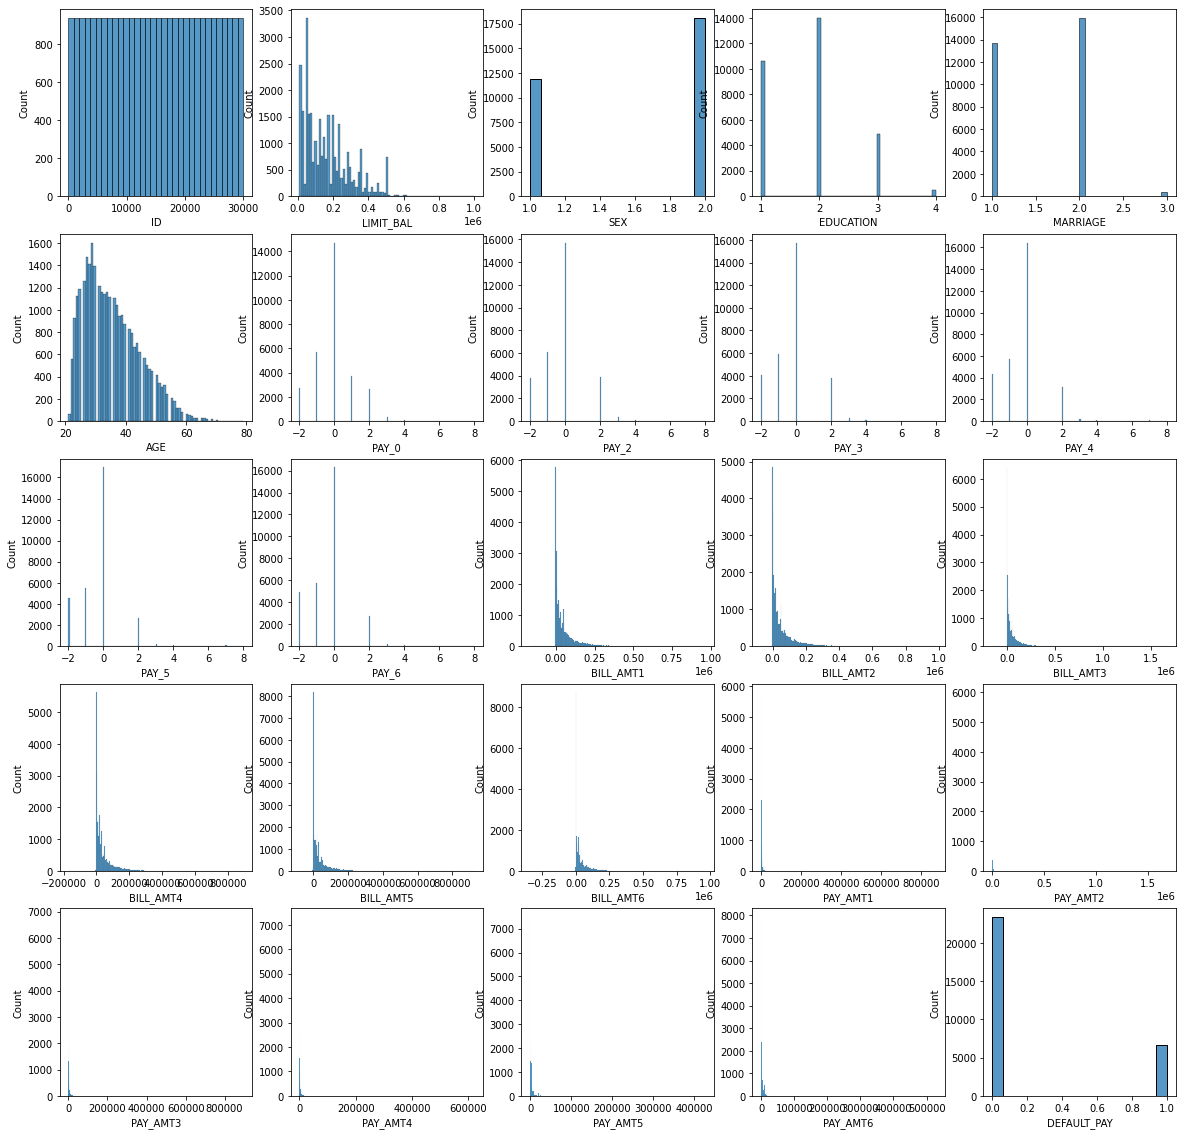

In [30]:
fig,axes=plt.subplots(nrows=5,ncols=5,figsize=(20,20))
for i,col in enumerate(data_df.describe().columns):
 sns.histplot(data_df[col],ax=axes[i//5,i%5])

In [31]:
data_df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'DEFAULT_PAY'],
      dtype='object')

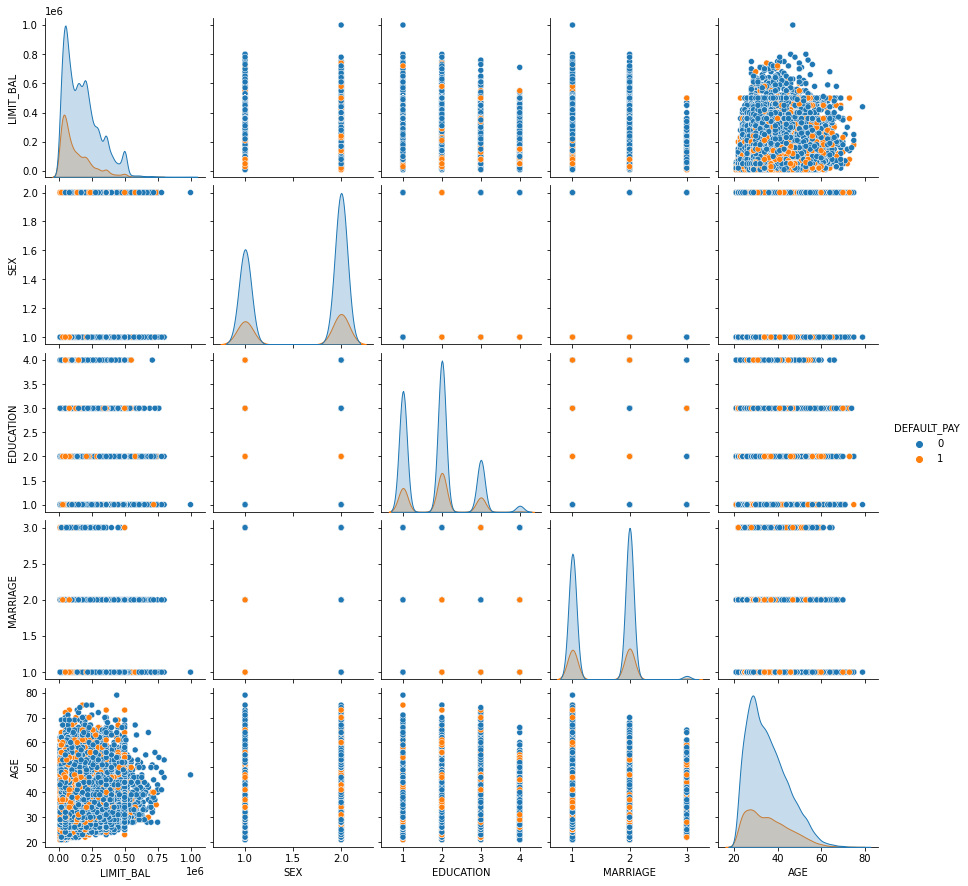

In [44]:
sns.pairplot(data_df, hue = 'DEFAULT_PAY', vars = ['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE'] )

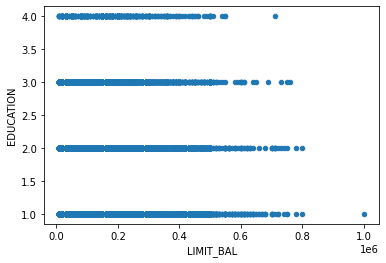

In [51]:
data_df.plot.scatter('LIMIT_BAL', 'EDUCATION')

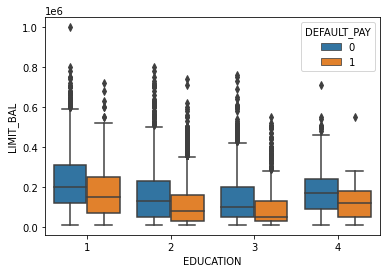

In [66]:
sns.boxplot(x = data_df['EDUCATION'],
            y = data_df['LIMIT_BAL'],
            hue = data_df['DEFAULT_PAY'])

In [44]:
#df=data_df.groupby(['PAY_0','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6'])[]


In [95]:
bill_amt_df = data_df[['BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']]
# for i in bill_amt_df:
#   plt.figure(figsize=(10,5))
#   ax = sns.countplot(x=i, hue='DEFAULT_PAY',data=data_df)
bill_amt_df.head()

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
0,3913,3102,689,0,0,0
1,2682,1725,2682,3272,3455,3261
2,29239,14027,13559,14331,14948,15549
3,46990,48233,49291,28314,28959,29547
4,8617,5670,35835,20940,19146,19131


ValueError: ignored

<Figure size 720x360 with 0 Axes>

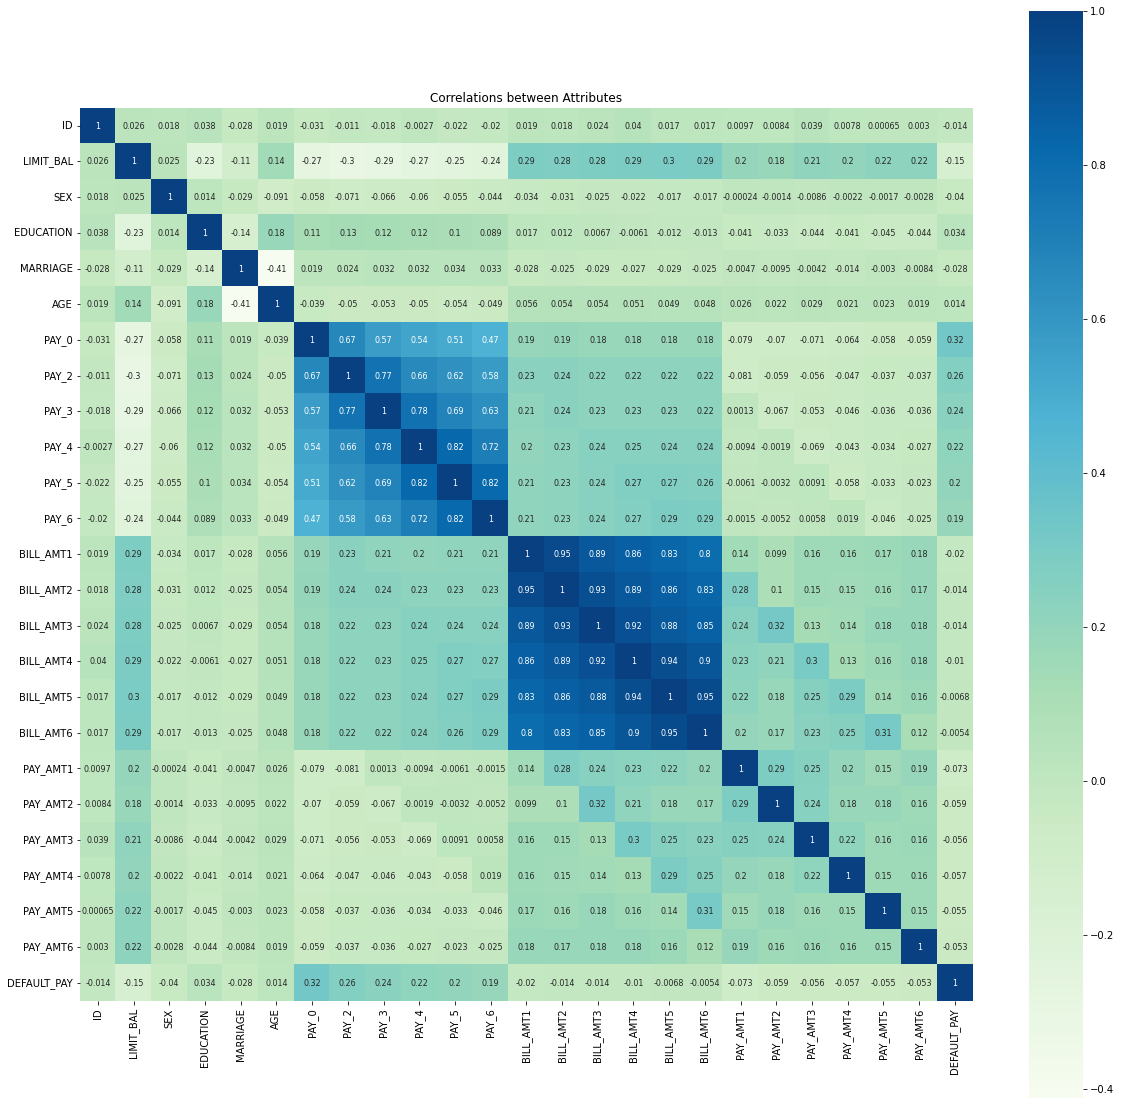

In [101]:
fig = plt.subplots (figsize = (20, 20))
sns.heatmap(data_df.corr (), square = True, cbar = True, annot = True, cmap="GnBu", annot_kws = {'size': 8})
plt.title('Correlations between Attributes')
plt.show ()

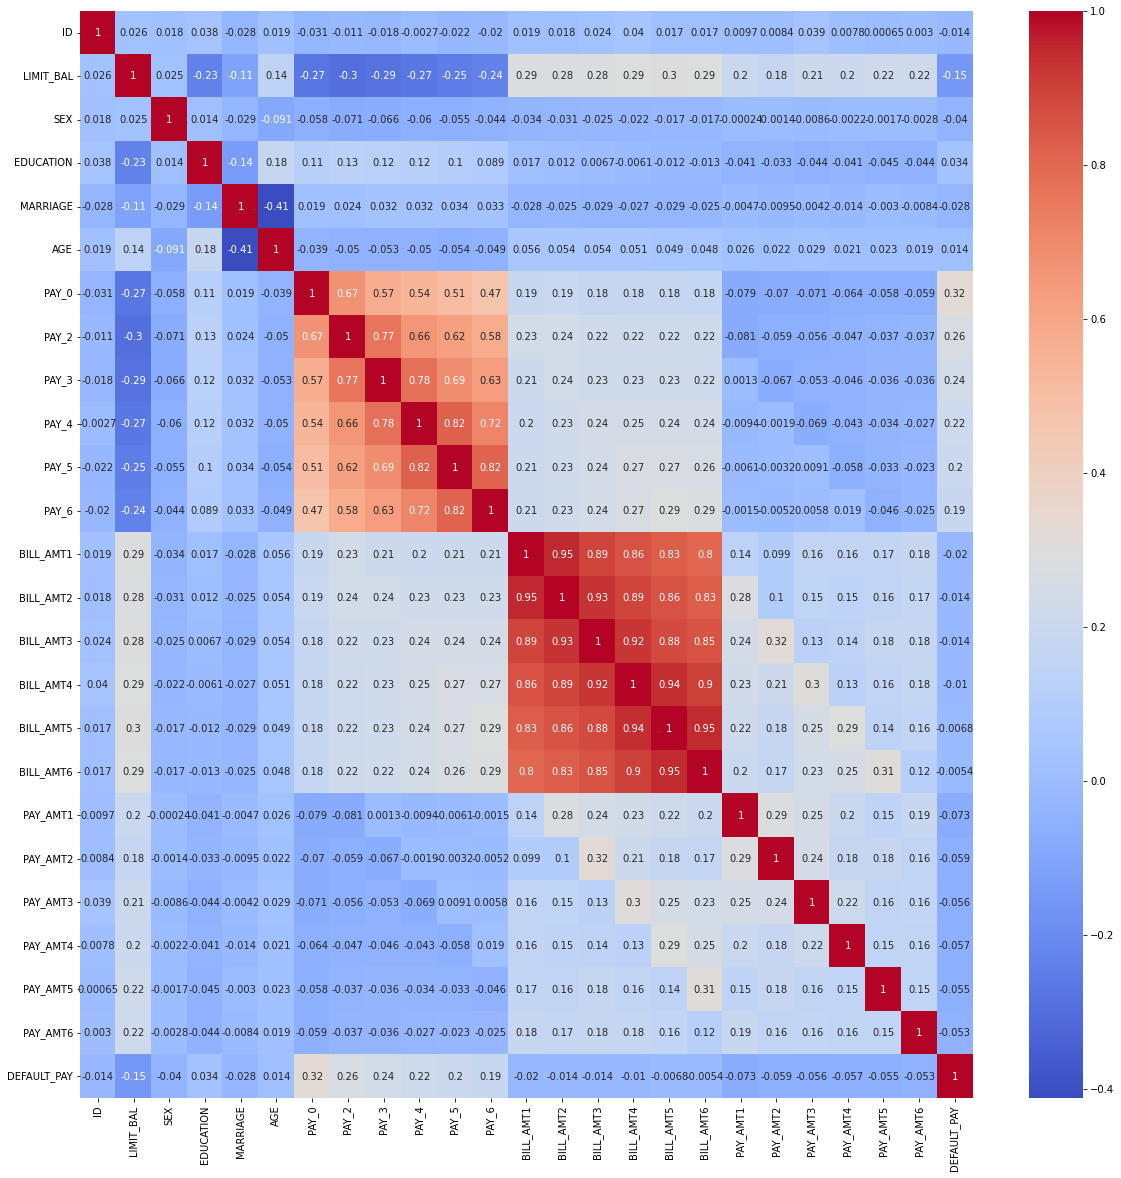

In [99]:
correlations = data_df.corr()
f, ax = plt.subplots(figsize = (20, 20))
sns.heatmap(correlations,cmap='coolwarm', annot = True);